In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
sypActual= pd.read_csv('syp.csv')
changeSyp = pd.read_csv('cambios_syp.csv')

In [120]:
def csv_date(url:str):
    data= pd.read_csv(url,index_col='Date')
    data.index=pd.to_datetime(data.index)
    return data

In [267]:
cierre =csv_date('metricas/cierre_syp.csv')
volumen= csv_date('metricas/volumen_syp.csv')
maximos= csv_date('metricas/maximos_syp.csv')
minimos= csv_date('metricas/minimos_syp.csv')
apertura = csv_date('metricas/apertura_syp.csv')

In [122]:
def anual_data(data):
    data.index=pd.to_datetime(data.index)
    x_anio = data.groupby(data.index.year).mean().round(3)
    x_anio = x_anio.transpose()
    return x_anio

def plot_six_m(data,valores):
    fig, ax = plt.subplots(figsize=(10,5))
    for i in valores:
        ax.plot(data.index,data[[i]],label=i)
    plt.legend()
    return plt.show()

def searcch_bussines(search):
    x = sypActual[sypActual.Symbol.isin(search)]
    return x

def mean_bussines(data, round:bool=True):
    if round == True: 
        group= pd.DataFrame(data.transpose().mean(axis=1).round(3), columns=['Promedio'])
    else:
        group= pd.DataFrame(data.transpose().mean(axis=1), columns=['Promedio'])
    return group

def five_year_back(data,anios:list=[2018,2019,2020,2021,2022,2023]):
    prome= {}
    for anio in anios:
        prome[anio]= data[data.index.year ==anio].transpose().mean(axis=1).round(3)
    prome['mean_total']= cierre.transpose().mean(axis=1).round(3)
    prome['current']= data[data.index.year ==2023].transpose().iloc[:,-1]
    datos= pd.DataFrame(prome)
    creci= (datos[datos.columns[:-3]].pct_change(axis=1)*100).round(3)
    datos['growth']=creci.mean(axis=1).round(3)
    return datos,creci

def search_mean(data,search):
    datos= five_year_back(data)[0]
    result = datos[datos.index.isin(search)]
    return result

In [123]:
sypActual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [124]:
changeSyp.head()

,Date,Added,Added.1,Removed,Removed.1,Reason
0,Date,Ticker,Security,Ticker,Security,Reason
1,"March 20, 2023",FICO,Fair Isaac,LUMN,Lumen Technologies,Market capitalization change.[4]
2,"March 15, 2023",BG,Bunge Limited,SBNY,Signature Bank,The Federal Deposit Insurance Corporation (FDI...
3,"March 15, 2023",PODD,Insulet,SIVB,SVB Financial Group,"The FDIC placed SVB's main subsidiary, Silicon..."
4,"January 5, 2023",NaN,NaN,VNO,Vornado Realty Trust,Market capitalization change.[7]


## Genero un nuevos dataset de datos por años
* uno agrupa y promedia el precio de cierre por año
* otro porcentajes de crecimiento

In [126]:
close_anual = anual_data(cierre)

In [127]:
import numpy as np
close_anual.replace([np.inf, -np.inf],0.0,inplace=True)
close_anual['mean_total'] =close_anual.mean(axis=1).round(3)
close_anual['current']=(cierre[cierre.index.year ==2023].transpose().iloc[:,-1]).round(3)
creci= close_anual[close_anual.columns[:-3]].pct_change(axis=1)*100
close_anual['growth']=creci.mean(axis=1).round(3)

In [ ]:
# close_anual.to_csv('cierre_anual.csv')
# creci.to_csv('crecimiento.csv')

## se le aplica tratamiento especial a : AAPL, MNST

_porque dan como resultado en el promedio de porcentaje de crecimiento infinito(inf)

In [128]:
close_anual[close_anual['growth']== np.inf]

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,mean_total,current,growth
AAPL,0.746,0.0,0.0,0.0,0.627,1.647,2.478,4.550,5.043,5.218,...,37.602,47.295,52.091,95.336,140.980,154.829,134.235,34.231,144.0,inf
MNST,0.000,0.0,0.0,0.0,0.385,1.766,5.542,7.259,5.285,5.802,...,51.693,57.653,59.190,73.269,91.738,90.020,101.471,30.386,104.0,inf


In [129]:
x= close_anual.iloc[3,4:-3].round()
cre =x.pct_change()*100
close_anual.iloc[3,].growth = cre.mean().round(2)

In [130]:
posicion = close_anual.index.get_loc(close_anual[close_anual['growth']== np.inf].index[0])  # obtinene la posicion numerica de lo buscado
c=close_anual.iloc[posicion,4:-4].pct_change()*100
close_anual.iloc[posicion,].growth = c.mean().round(2)


In [301]:
creci=creci.round(3)
creci.head()

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
A,NaN,-52.033,-31.358,-11.802,32.758,0.765,24.859,6.096,-15.858,-27.565,...,17.180,21.362,-2.461,9.423,36.775,13.260,11.968,22.954,56.423,-8.115
AAL,NaN,NaN,NaN,NaN,NaN,NaN,52.684,-19.550,-78.319,-50.601,...,73.293,114.190,15.901,-15.364,24.341,-9.943,-27.773,-50.562,33.087,-24.851
AAP,NaN,NaN,15.558,21.138,30.101,42.979,-3.241,1.310,-4.791,12.713,...,11.985,53.667,24.981,-4.964,-21.153,13.576,13.854,-11.382,42.762,-5.008
AAPL,NaN,-100.000,NaN,NaN,0.000,162.679,50.455,83.616,10.835,3.470,...,-18.048,36.653,30.314,-13.186,44.185,25.778,10.141,83.018,47.877,9.823
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.057,11.997,-2.376,23.907,29.710,-20.002,16.580,24.362,31.532


In [300]:
creci=creci.replace([np.inf,-np.inf], 0)  #  apply(lambda x : x.replace([np.inf,-np.inf], 0) if x  ==  np.inf) else x)

In [ ]:
close_anual.head(7)

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,mean_total,current,growth
A,49.849,23.911,16.413,14.476,19.218,19.365,24.179,25.653,21.585,15.635,...,59.307,67.171,75.210,92.474,144.651,132.912,154.118,49.777,156.0,8.053
AAL,NaN,NaN,NaN,NaN,NaN,29.045,44.347,35.677,7.735,3.821,...,47.482,42.761,30.885,15.269,20.321,15.271,15.588,25.010,17.0,11.162
AAP,NaN,14.636,16.913,20.488,26.655,38.111,36.876,37.359,35.569,40.091,...,122.610,139.255,158.548,140.502,200.583,190.538,150.000,91.079,148.0,14.558
AAPL,0.746,0.000,0.000,0.000,0.627,1.647,2.478,4.550,5.043,5.218,...,37.602,47.295,52.091,95.336,140.980,154.829,134.235,34.231,144.0,41.320
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.151,97.478,77.980,90.909,113.056,148.705,154.941,89.103,147.0,15.863
ABC,7.532,14.202,17.063,14.790,14.103,17.131,22.291,24.394,19.565,19.853,...,86.124,89.100,82.813,94.957,117.500,149.012,163.824,57.534,165.0,17.101
ABT,18.734,22.440,20.591,18.567,19.885,21.766,21.578,26.088,26.478,23.242,...,48.558,64.239,80.567,96.111,121.532,111.833,112.176,45.698,111.0,9.320


## EDA

In [132]:
sectores=sypActual['GICS Sector'].unique()

In [ ]:
sector= sypActual[sypActual['GICS Sector']=='Consumer Discretionary']['Symbol'].values
close_anual[close_anual.index.isin(sector)].transpose()[:-3].plot()

In [133]:
"""busca dentro del sector especificado y devuelve los valores de las empresas"""
def search_bussine_anual(sector):
    symbol= sypActual[sypActual['GICS Sector']==sector]['Symbol'].values
    result= close_anual[close_anual.index.isin(symbol)]
    return result

In [134]:
def data_sector_mean(sector,data):
    sector=sypActual[sypActual['GICS Sector']==sector]['Symbol'].values
    promedio= data[data.index.isin(sector)]
    promedio = promedio.mean(axis=0).round().to_frame().T
    return promedio

def sector_browth_grafic(sector):
    promedio= data_sector_mean(sector,close_anual)
    return promedio.transpose()[:-4].plot.bar()
    

In [135]:
x= search_bussine_anual('Consumer Discretionary')
x.head()

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,mean_total,current,growth
AAP,NaN,14.636,16.913,20.488,26.655,38.111,36.876,37.359,35.569,40.091,...,122.610,139.255,158.548,140.502,200.583,190.538,150.000,91.079,148.0,14.558
AMZN,2.317,0.706,0.992,1.877,2.147,2.000,1.896,3.375,3.542,4.377,...,48.394,82.100,89.460,134.020,167.171,126.104,92.765,36.728,99.0,26.600
APTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.008,86.976,82.881,85.708,153.742,106.410,101.235,73.619,107.0,22.021
AZO,25.083,42.387,73.921,80.940,83.103,90.409,98.343,125.088,120.526,150.357,...,640.438,724.406,1058.349,1108.862,1542.298,2152.869,2389.000,574.527,2415.0,24.304
BBWI,17.024,12.427,13.921,12.282,16.869,17.996,21.247,19.956,12.937,10.647,...,40.016,29.139,18.365,19.178,57.639,42.375,45.706,30.202,45.0,12.785


In [264]:
x=data_sector_mean('Consumer Discretionary',close_anual)

In [266]:
f =(x.loc[0].pct_change()*100).mean().round(3)
f

12.572

In [249]:
data={}
for i in sectores:
    data[i]=data_sector_mean(i,close_anual)
    

In [250]:
g=pd.concat(data.values(),keys=data.keys())


In [261]:
n=pd.read_csv('business_anual.csv',index_col='Unnamed: 0'	)

In [259]:
#n.drop(columns=['Unnamed: 1'],inplace=True)
n.to_csv('business_anual.csv')

In [247]:
n.rename(columns={'Unnamed: 0':'Name'},inplace=True)

In [262]:
n

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,mean_total,current,growth
Industrials,27.0,28.0,26.0,25.0,31.0,35.0,40.0,45.0,38.0,29.0,...,99.0,113.0,119.0,122.0,165.0,161.0,168.0,74.0,169.0,14.0
Health Care,26.0,26.0,24.0,24.0,29.0,32.0,35.0,40.0,35.0,30.0,...,118.0,136.0,148.0,179.0,238.0,223.0,229.0,88.0,232.0,17.0
Information Technology,41.0,22.0,16.0,17.0,21.0,22.0,26.0,30.0,28.0,23.0,...,75.0,94.0,111.0,143.0,212.0,189.0,187.0,75.0,196.0,19.0
Communication Services,27.0,24.0,19.0,19.0,19.0,19.0,20.0,25.0,20.0,14.0,...,73.0,84.0,85.0,103.0,135.0,95.0,86.0,55.0,92.0,13.0
Consumer Staples,24.0,26.0,27.0,26.0,31.0,34.0,36.0,40.0,36.0,31.0,...,79.0,80.0,86.0,94.0,110.0,117.0,116.0,60.0,116.0,10.0
Consumer Discretionary,22.0,21.0,26.0,30.0,38.0,48.0,48.0,54.0,43.0,39.0,...,176.0,196.0,221.0,236.0,330.0,314.0,330.0,126.0,344.0,18.0
Utilities,24.0,27.0,23.0,22.0,26.0,31.0,33.0,40.0,35.0,28.0,...,57.0,57.0,66.0,66.0,69.0,74.0,74.0,45.0,73.0,7.0
Financials,72.0,71.0,60.0,57.0,67.0,66.0,74.0,78.0,50.0,30.0,...,87.0,98.0,107.0,113.0,150.0,140.0,143.0,78.0,147.0,11.0
Materials,22.0,23.0,24.0,24.0,30.0,31.0,37.0,46.0,43.0,33.0,...,84.0,89.0,88.0,91.0,128.0,124.0,126.0,61.0,129.0,13.0
Real Estate,35.0,27.0,25.0,27.0,33.0,40.0,53.0,59.0,49.0,35.0,...,103.0,100.0,117.0,117.0,144.0,139.0,126.0,72.0,129.0,11.0


In [ ]:
import time
prome={}
for sec in sectores:
    promedio=data_sector_mean(sec,close_anual)
    prome[sec]=(promedio.loc[0][:-4].pct_change()*100).mean().round(2)
    sector_browth_grafic(sec)
    plt.title(sec)
    time.sleep(0.5)
prome= pd.DataFrame.from_dict(prome,orient='index',columns=['mean_growth'])
prome.sort_values('mean_growth',ascending=False)

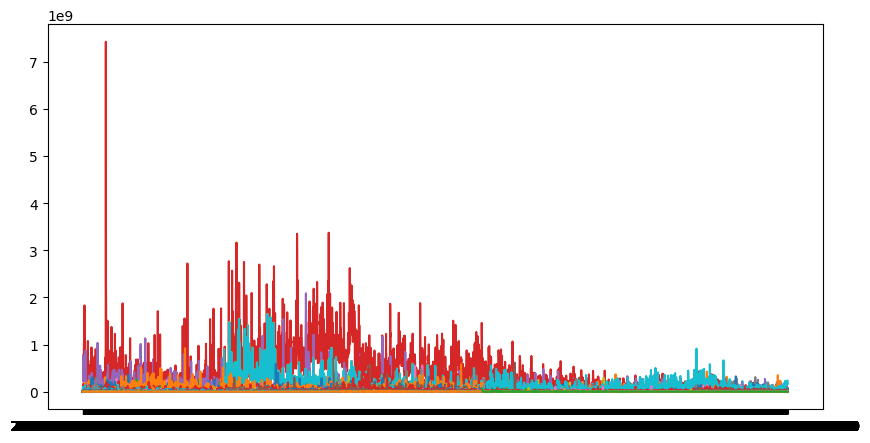

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(volumen.index,volumen)

plt.show()

In [ ]:
searcch_bussines(['CHTR', 'BLK', 'EQIX', 'TDG', 'NOW'])

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
69,BLK,BlackRock,Financials,Asset Management & Custody Banks,"New York City, New York",2011-04-04,1364742,1988
104,CHTR,Charter Communications,Communication Services,Cable & Satellite,"Stamford, Connecticut",2016-09-08,1091667,1993
179,EQIX,Equinix,Real Estate,Specialized REITs,"Redwood City, California",2015-03-20,1101239,1998
417,NOW,ServiceNow,Information Technology,Systems Software,"Santa Clara, California",2019-11-21,1373715,2003
452,TDG,TransDigm Group,Industrials,Aerospace & Defense,"Cleveland, Ohio",2016-06-03,1260221,1993


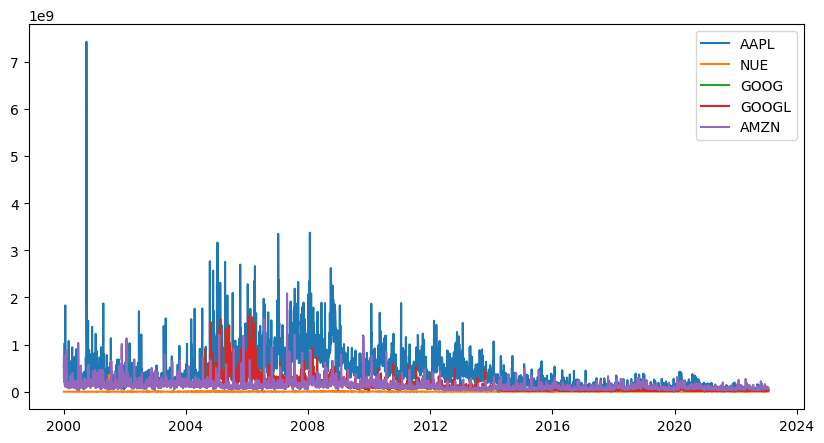

In [ ]:
plot_six_m(volumen,['AAPL', 'NUE', 'GOOG', 'GOOGL', 'AMZN'])

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(close_anual.columns[:-3],close_anual.loc[sector1])

plt.show()

In [ ]:
close_anual.loc[sector1]

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,mean_total,current,growth
MMM,45.988,55.653,60.877,68.782,81.901,77.806,76.936,83.992,71.534,63.933,...,205.275,211.191,179.817,159.743,187.730,139.032,123.176,113.926,114.0,6.274
AOS,3.040,2.968,4.464,5.060,4.821,5.024,7.108,6.681,5.731,5.687,...,55.100,58.020,48.329,47.889,69.056,61.466,60.294,25.179,59.0,16.903
ADP,44.115,42.778,36.587,28.389,33.960,34.917,36.721,40.629,35.822,33.464,...,106.163,131.582,159.762,152.178,200.413,228.781,237.647,84.258,225.0,8.716
ALK,7.008,6.976,6.433,5.758,6.222,7.754,9.303,7.574,5.395,5.944,...,83.733,64.430,63.337,42.285,59.813,47.777,47.941,30.986,51.0,13.491
ALLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.398,83.618,101.258,107.067,130.595,107.550,111.529,85.681,113.0,11.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.450,...,84.127,109.940,141.734,173.229,193.325,186.530,181.706,98.986,181.0,16.234
WAB,5.373,6.593,6.861,7.060,8.754,11.298,15.805,17.936,21.431,17.452,...,79.793,92.223,71.996,64.470,84.234,91.398,102.294,45.853,104.0,15.496
WM,18.591,27.621,25.679,24.524,28.790,28.917,35.311,36.649,33.648,29.298,...,75.406,86.761,109.052,110.723,141.706,158.618,154.176,59.481,152.0,11.137
GWW,38.171,40.367,50.425,47.179,53.786,62.111,71.315,85.104,81.130,83.774,...,202.434,300.869,293.321,330.996,433.865,517.363,562.412,194.358,565.0,13.692


In [ ]:
close_anual[close_anual.index.isin(['BA', 'ULTA', 'ANSS', 'SBAC', 'MCO'])]

Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,mean_total,current,growth
ANSS,2.845,4.210,5.508,7.786,11.746,18.147,23.637,30.211,37.783,32.206,...,121.367,165.227,202.147,293.352,361.786,269.673,250.706,97.489417,267.0,24.814569
BA,48.440,51.835,39.706,33.234,47.698,62.278,79.976,94.574,66.466,45.107,...,215.223,344.685,365.028,197.083,224.512,166.167,208.882,125.335583,213.0,10.125004
MCO,11.540,16.085,22.333,25.575,34.897,47.405,62.582,56.980,33.209,24.492,...,125.614,164.498,196.885,265.794,345.020,299.713,304.765,103.687750,318.0,18.821311
SBAC,40.706,21.597,2.460,2.567,5.488,12.798,24.135,32.096,28.308,25.437,...,135.506,162.311,219.698,289.723,316.127,315.964,293.706,102.458667,291.0,23.141843
ULTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.522,12.138,11.250,...,254.410,247.558,299.544,233.099,347.603,402.052,492.235,181.209588,507.0,28.867391


In [ ]:
cierre.iloc[-1][search]

BA      213.0
ULTA    507.0
ANSS    267.0
SBAC    291.0
MCO     318.0
Name: 2023-01-26 00:00:00, dtype: float64

In [ ]:
cierre[cierre.index.year ==2023][search].mean()

BA      208.882353
ULTA    492.235294
ANSS    250.705882
SBAC    293.705882
MCO     304.764706
dtype: float64

In [ ]:
prom=close_anual[(close_anual['mean_total'] > 100) & (close_anual['mean_total'] <= 250)& (close_anual.growth > 15)]
search= prom.sort_values(['mean_total','growth'],ascending=False).index[:6]

In [ ]:
search

Index(['REGN', 'NOW', 'AVGO', 'ORLY', 'PAYC', 'ULTA'], dtype='object')

In [ ]:
search_mean(cierre,search)

,2018,2019,2020,2021,2022,2023,mean_total,current,growth
AVGO,239.207,287.798,322.107,494.040,541.462,575.647,196.634,599.0,23.803
NOW,173.685,254.889,409.020,574.976,469.016,411.529,215.926,463.0,32.342
ORLY,293.968,390.222,421.407,564.325,705.685,814.647,167.721,801.0,24.925
PAYC,116.777,210.103,308.142,417.425,324.510,306.588,176.931,321.0,34.946
REGN,351.717,343.524,532.379,558.337,662.482,721.412,207.161,742.0,19.044
ULTA,247.558,299.544,233.099,347.603,402.052,492.235,170.451,507.0,15.901


In [ ]:
x= five_year_back(cierre)
x[0]

In [ ]:
x[1]

,2018,2019,2020,2021,2022
A,NaN,11.968,22.954,56.423,-8.115
AAL,NaN,-27.773,-50.562,33.087,-24.851
AAP,NaN,13.854,-11.382,42.762,-5.008
AAPL,NaN,10.141,83.018,47.877,9.823
ABBV,NaN,-20.002,16.580,24.362,31.532
...,...,...,...,...,...
YUM,NaN,23.267,-10.498,28.452,-0.552
ZBH,NaN,9.255,3.981,14.634,-21.810
ZBRA,NaN,37.223,28.984,94.391,-33.763
ZION,NaN,-10.961,-23.610,59.656,1.454


In [ ]:
x= datos.iloc[0,:5]
cre =x.pct_change()*100
cre.mean()

20.807464144532425

In [ ]:
search_mean(cierre,['AAPL', 'NUE', 'GOOG', 'GOOGL', 'AMZN'])

,2018,2019,2020,2021,2022,2023,mean_total,current,growth
AAPL,47.295,52.091,95.336,140.980,154.829,134.235,30.202,144.0,37.715
AMZN,82.100,89.460,134.020,167.171,126.104,92.765,34.490,99.0,14.736
GOOG,55.629,59.421,74.083,125.528,115.211,93.059,37.829,99.0,23.179
GOOGL,56.124,59.544,73.957,124.222,114.761,92.059,37.964,98.0,22.662
NUE,63.283,55.063,45.221,92.841,129.861,150.294,46.631,170.0,28.579


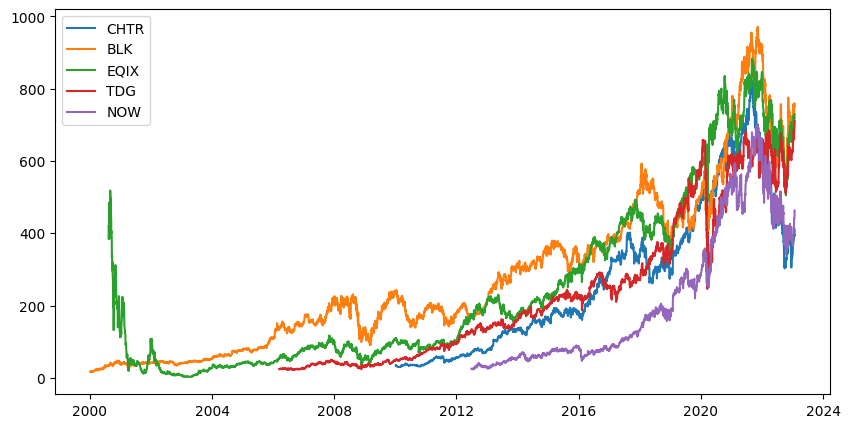

In [ ]:
plot_six_m(cierre,['CHTR', 'BLK', 'EQIX', 'TDG', 'NOW'])

In [ ]:
select=sypActual[sypActual['GICS Sector']=='Information Technology']

In [ ]:
cierre.shape

(5804, 503)

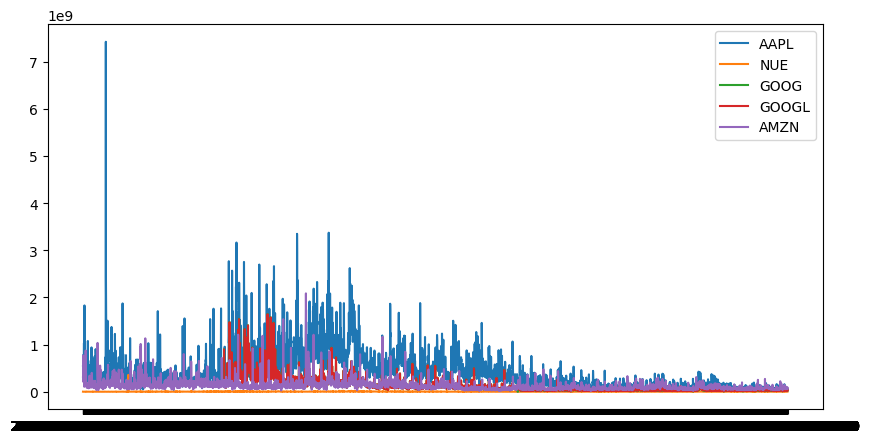

In [ ]:
plot_six_m(volumen,search)

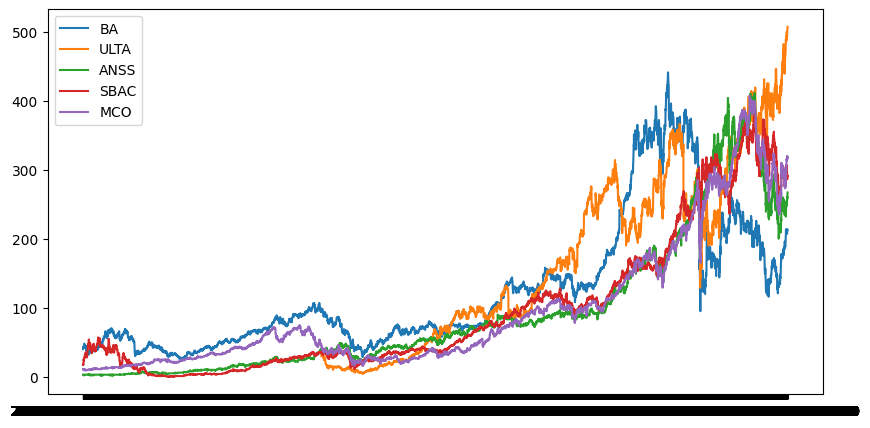

In [ ]:
plot_six_m(cierre,search)

In [ ]:
searcch_bussines(search)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
41,ANSS,Ansys,Information Technology,Application Software,"Canonsburg, Pennsylvania",2017-06-19,1013462,1969
71,BA,Boeing,Industrials,Aerospace & Defense,"Chicago, Illinois",1957-03-04,12927,1916
328,MCO,Moody's Corporation,Financials,Financial Exchanges & Data,"New York City, New York",1998-07-01,1059556,1909
412,SBAC,SBA Communications,Real Estate,Telecom Tower REITs,"Boca Raton, Florida",2017-09-01,1034054,1989
460,ULTA,Ulta Beauty,Consumer Discretionary,Specialty Stores,"Bolingbrook, Illinois",2016-04-18,1403568,1990


<AxesSubplot: xlabel='Date'>

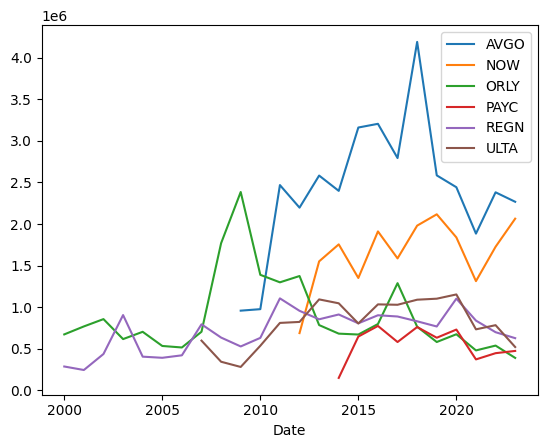

In [ ]:

vol = anual_data(volumen) 
vol[vol.index.isin(search)].transpose().plot()

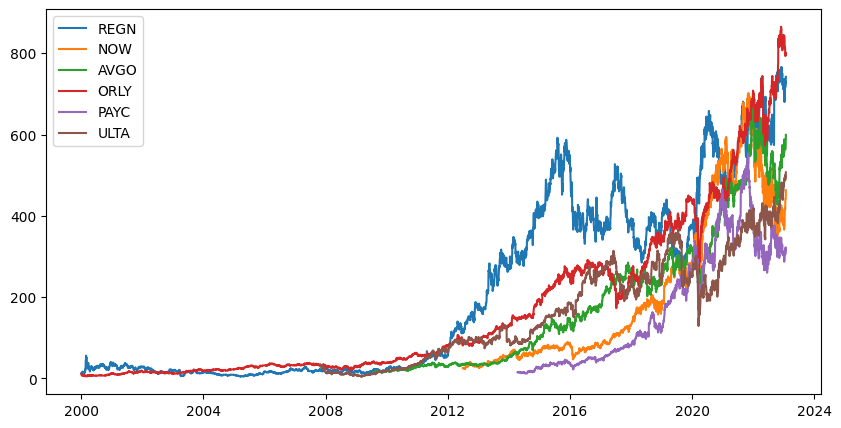

In [ ]:
plot_six_m(cierre,search)

<AxesSubplot: xlabel='Date'>

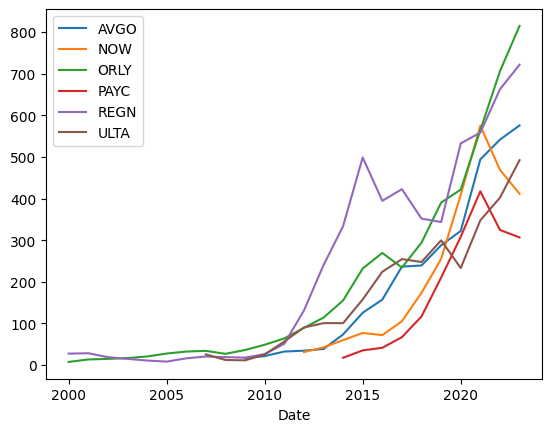

In [ ]:
close_anual[close_anual.index.isin(search)][close_anual.columns[:-3]].transpose().plot()

In [ ]:
close_anual.growth.min()

-6.144

In [ ]:
print(int(close_anual['growth'].max().round()))

129


<AxesSubplot: xlabel='Date'>

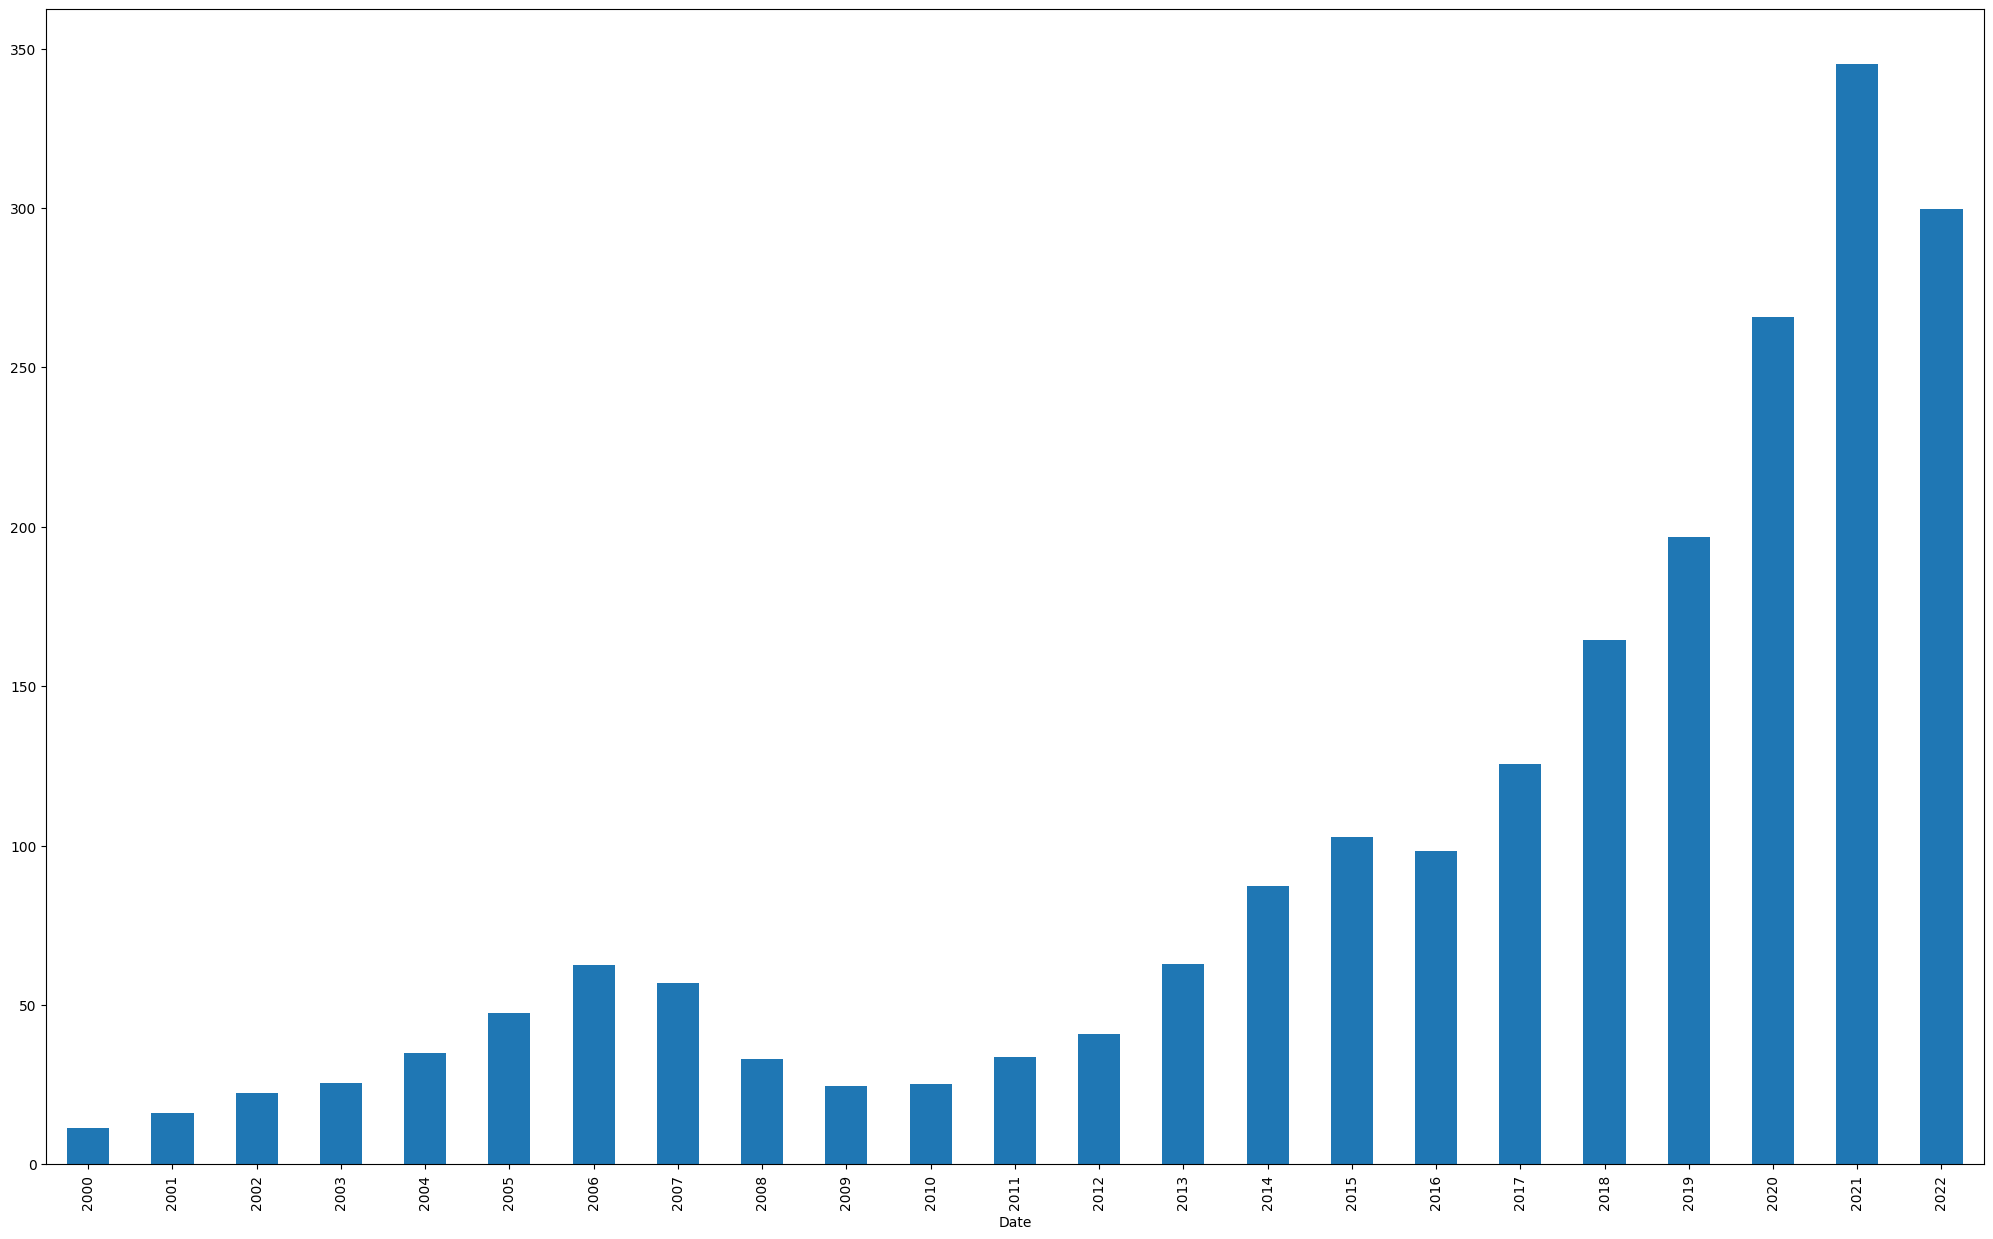

In [ ]:
close_anual.loc['MCO'][:-4].plot.bar()


<AxesSubplot: xlabel='Date'>

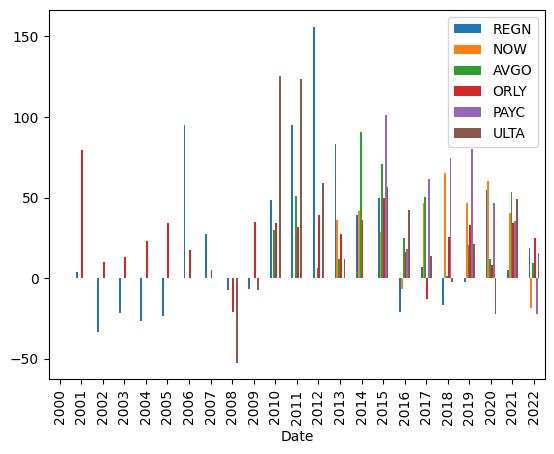

In [ ]:
creci.loc[search].transpose().plot.bar()
#creci.loc[search][:-3].plot.bar()

In [302]:
import yfinance as yf

In [ ]:
start_date = "2000-01-01"
end_date = "2023-01-27"

In [ ]:
syp = yf.download('^GSPC', start=start_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
syp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5845 entries, 2000-01-03 to 2023-03-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5845 non-null   float64
 1   High       5845 non-null   float64
 2   Low        5845 non-null   float64
 3   Close      5845 non-null   float64
 4   Adj Close  5845 non-null   float64
 5   Volume     5845 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 319.6 KB


In [ ]:
syp=syp.round()

In [ ]:
syp.index = pd.to_datetime(syp.index)

In [ ]:
anual_syp= syp.groupby(syp.index.year).mean().round()
anual_syp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000,1428.0,1440.0,1414.0,1427.0,1427.0,1.034489e+09
2001,1195.0,1204.0,1183.0,1194.0,1194.0,1.232068e+09
2002,995.0,1004.0,984.0,994.0,994.0,1.429026e+09
2003,964.0,971.0,958.0,965.0,965.0,1.384451e+09
2004,1130.0,1136.0,1125.0,1131.0,1131.0,1.423204e+09
2005,1207.0,1213.0,1202.0,1207.0,1207.0,1.919904e+09
2006,1310.0,1316.0,1304.0,1310.0,1310.0,2.394513e+09
2007,1477.0,1485.0,1468.0,1477.0,1477.0,3.227438e+09
2008,1222.0,1236.0,1205.0,1220.0,1220.0,5.033223e+09


<AxesSubplot: xlabel='Date'>

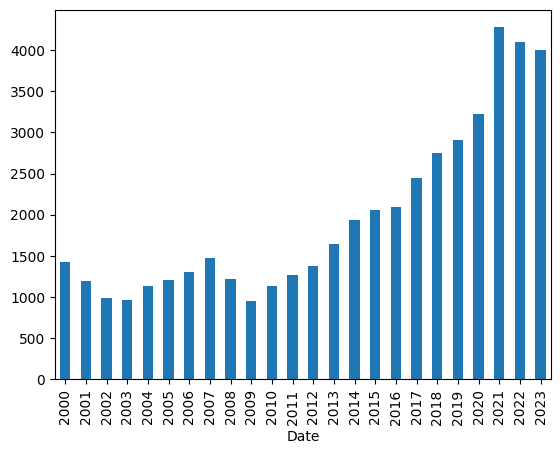

In [ ]:
anual_syp['Close'].plot.bar()

In [ ]:
anual_syp['Close'].mean().round()

1960.0

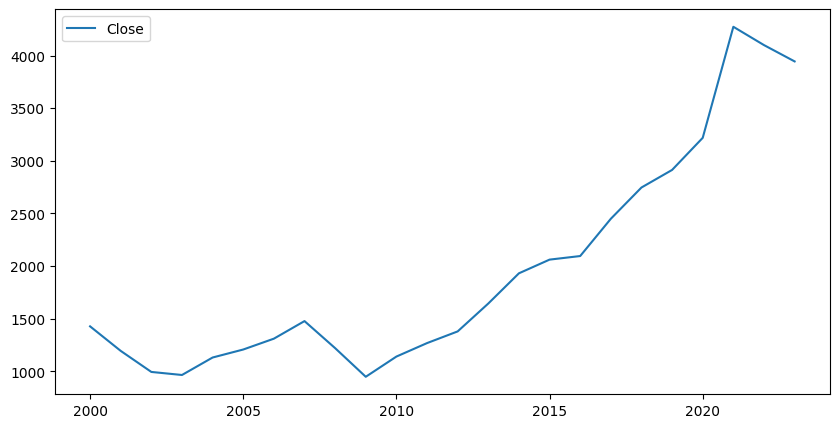

In [ ]:
plot_six_m(anual_syp,['Close'])

In [ ]:
p= syp
p=p.reset_index()
p = p.groupby([p['Date'].dt.year,p['Date'].dt.month]).mean().round(3)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7520\4258858765.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = p.groupby([p['Date'].dt.year,p['Date'].dt.month]).mean().round(3)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
radio=syp[syp.index.year== 2020]

month=radio.groupby(radio.index.month).mean()
month

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1,3276.805734,3289.698556,3264.346191,3278.202858,3278.202858,3.680380e+09
2,3285.607358,3302.210513,3259.629472,3277.314183,3277.314183,4.444031e+09
3,2653.187722,2714.109530,2578.604093,2652.393632,2652.393632,7.372063e+09
4,2758.609026,2789.571417,2730.089518,2761.975226,2761.975226,5.886103e+09
5,2919.705505,2942.121497,2895.077502,2919.608484,2919.608484,5.356760e+09
6,3106.273626,3130.544966,3074.186812,3104.660933,3104.660933,5.975404e+09
7,3203.598644,3223.786366,3182.509976,3207.619096,3207.619096,4.405824e+09
8,3384.889997,3399.883347,3374.263323,3391.710019,3391.710019,3.926977e+09
9,3373.977132,3398.818092,3336.790946,3365.516671,3365.516671,4.395751e+09


In [ ]:
def creci_porcentaje(data):
    f=data['Close'].pct_change()*100
    cre = f.mean().round()
    return cre, f

In [ ]:
metr= creci_porcentaje(month)
metr[0]

1.0

In [ ]:
metr[1]

Date
1           NaN
2     -0.027109
3    -19.068070
4      4.131423
5      5.707265
6      6.338262
7      3.316245
8      5.739177
9     -0.772276
10     1.580242
11     3.811170
12     4.122791
Name: Close, dtype: float64

In [ ]:
f=anual_syp['Close'].pct_change()*100
cre = f.mean().round()
cre

6.0

Text(0.5, 1.0, 'valor real')

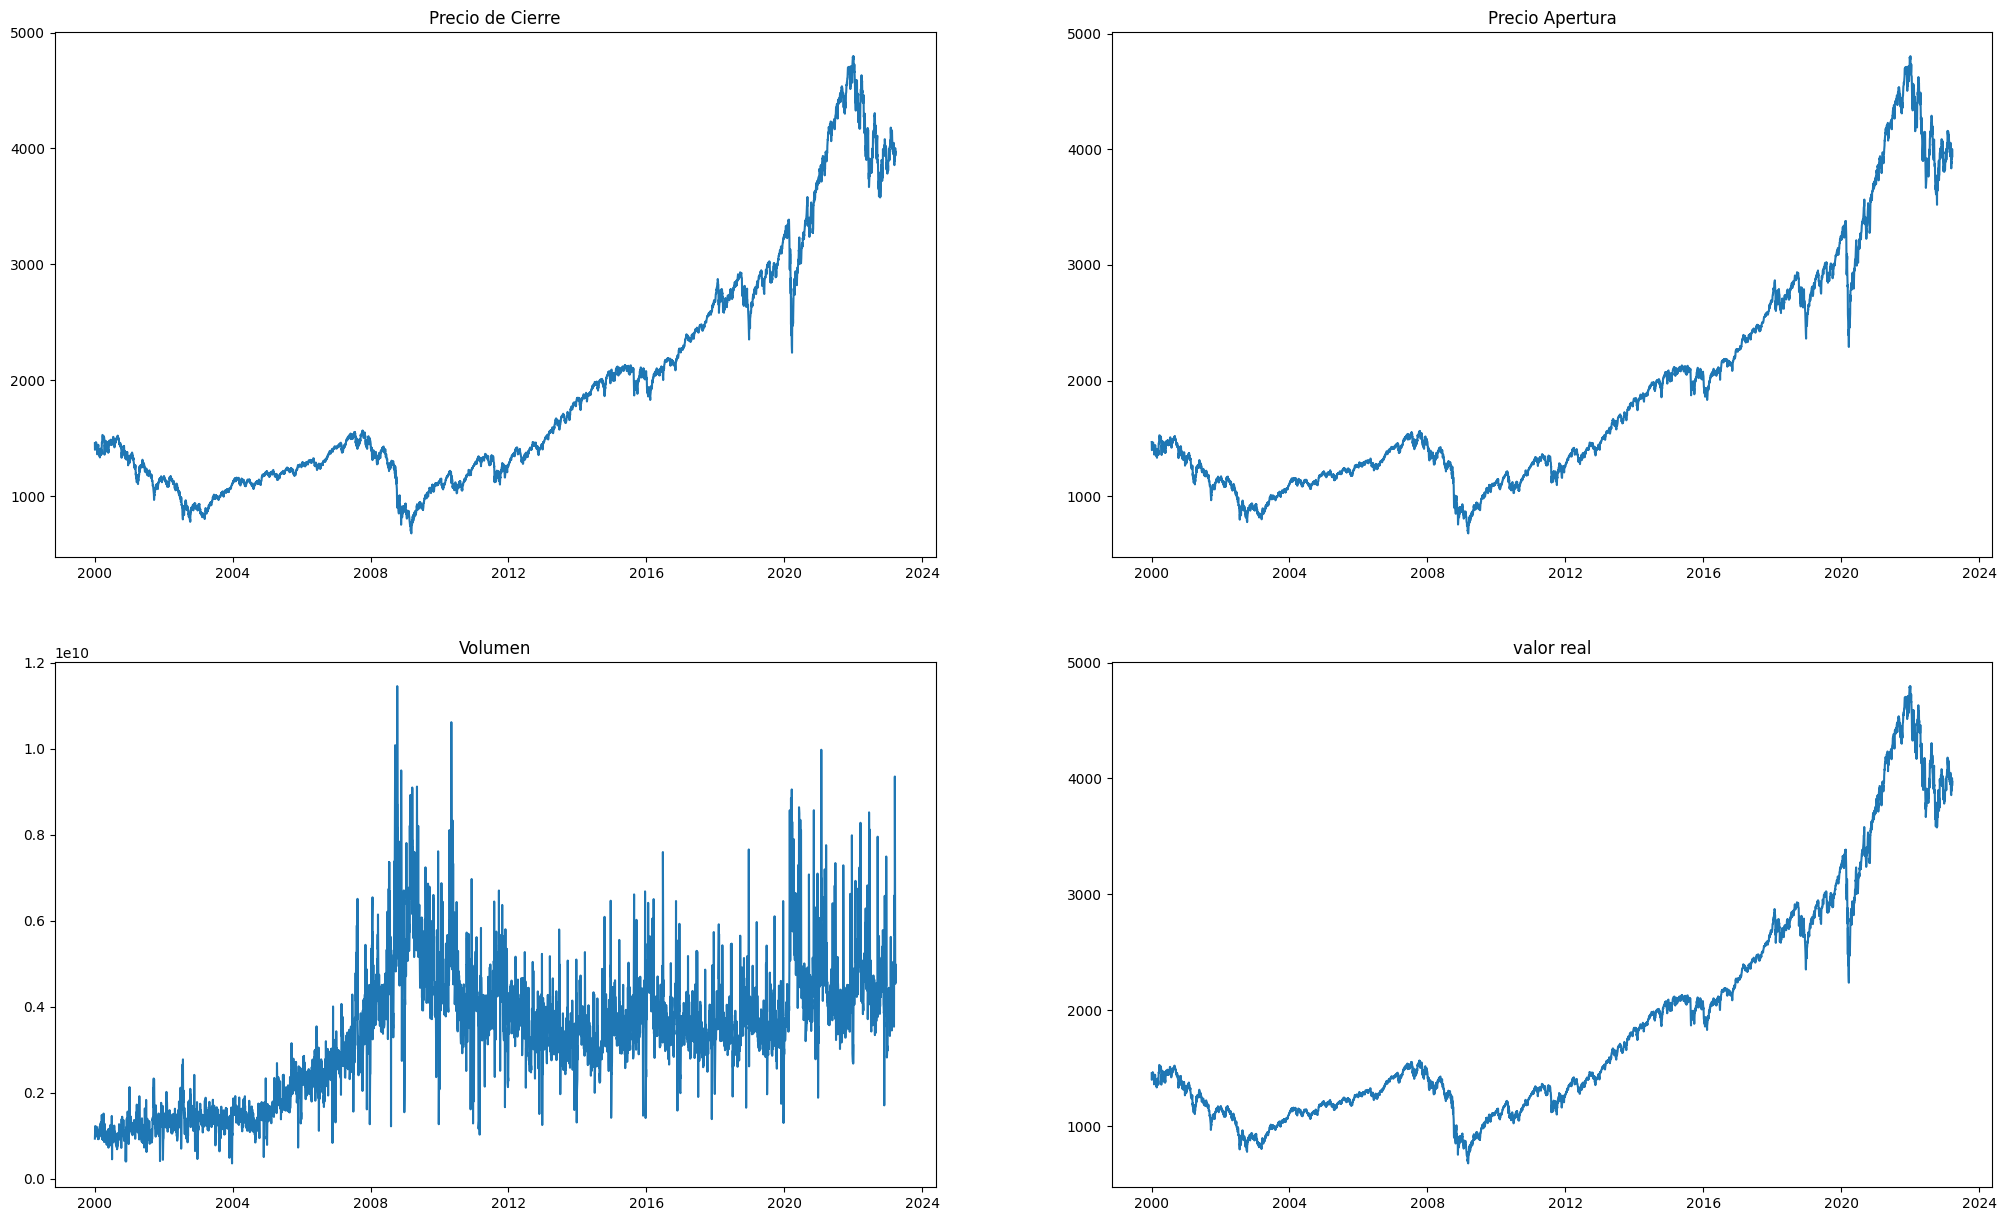

In [ ]:
plt.rc('figure', figsize = (25, 15))
area = plt.figure()
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

g1.plot(syp.index, syp['Close'])
g1.set_title('Precio de Cierre')

g2.plot(syp.index, syp['Open'])
g2.set_title('Precio Apertura')

g3.plot(syp.index, syp['Volume'])
g3.set_title('Volumen')

g4.plot(syp.index, syp['Adj Close'])
g4.set_title('valor real')

In [289]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [290]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,202.085266,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,203.287552,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,203.126022,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,203.852737,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,203.179840,46939700
...,...,...,...,...,...,...
2017-04-24,237.179993,237.410004,234.559998,237.169998,213.714615,119209900
2017-04-25,237.910004,238.949997,237.809998,238.550003,214.958099,76698300
2017-04-26,238.509995,239.529999,238.350006,238.399994,214.822937,84702500


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2017-01-03 to 2017-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       81 non-null     float64
 1   High       81 non-null     float64
 2   Low        81 non-null     float64
 3   Close      81 non-null     float64
 4   Adj Close  81 non-null     float64
 5   Volume     81 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.4 KB


In [303]:
data2 = pdr.get_data_yahoo("SPY CHTR BLK'", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  3 of 3 completed

1 Failed download:
- BLK': No timezone found, symbol may be delisted


In [304]:
data2

Adj Close                         Close                          \
                BLK'        CHTR         SPY  BLK'        CHTR         SPY   
Date                                                                         
2017-01-03       NaN  285.769989  202.085281   NaN  285.769989  225.240005   
2017-01-04       NaN  291.549988  203.287476   NaN  291.549988  226.580002   
2017-01-05       NaN  296.170013  203.125992   NaN  296.170013  226.399994   
2017-01-06       NaN  298.160004  203.852768   NaN  298.160004  227.210007   
2017-01-09       NaN  296.260010  203.179871   NaN  296.260010  226.460007   
...              ...         ...         ...   ...         ...         ...   
2017-04-24       NaN  340.359985  213.714569   NaN  340.359985  237.169998   
2017-04-25       NaN  344.500000  214.958099   NaN  344.500000  238.550003   
2017-04-26       NaN  345.399994  214.822937   NaN  345.399994  238.399994   
2017-04-27       NaN  348.799988  215.003159   NaN  348.799988  238.600006   
2017-04-28       NaN  345.160004  214.534576   NaN  345.160004  238.080002   

           High                          Low                         Open  \
           BLK'        CHTR         SPY BLK'        CHTR         SPY BLK'   
Date                                                                        
2017-01-03  NaN  291.440002  225.830002  NaN  282.540009  223.880005  NaN   
2017-01-04  NaN  292.079987  226.750000  NaN  284.230011  225.610001  NaN   
2017-01-05  NaN  297.130005  226.580002  NaN  289.730011  225.479996  NaN   
2017-01-06  NaN  298.790009  227.750000  NaN  294.459991  225.899994  NaN   
2017-01-09  NaN  297.940002  227.070007  NaN  294.709991  226.419998  NaN   
...         ...         ...         ...  ...         ...         ...  ...   
2017-04-24  NaN  342.140015  237.410004  NaN  338.739990  234.559998  NaN   
2017-04-25  NaN  345.299988  238.949997  NaN  340.890015  237.809998  NaN   
2017-04-26  NaN  350.380005  239.529999  NaN  344.850006  238.350006  NaN   
2017-04-27  NaN  350.350006  238.949997  NaN  346.100006  237.979996  NaN   
2017-04-28  NaN  349.989990  238.929993  NaN  342.779999  237.929993  NaN   

                                   Volume                      
                  CHTR         SPY   BLK'     CHTR        SPY  
Date                                                           
2017-01-03  290.239990  225.039993    NaN  1697700   91366500  
2017-01-04  286.980011  225.619995    NaN  1632500   78744400  
2017-01-05  289.750000  226.270004    NaN  1711900   78379000  
2017-01-06  296.119995  226.529999    NaN  1101300   71559900  
2017-01-09  297.200012  226.910004    NaN  1719500   46939700  
...                ...         ...    ...      ...        ...  
2017-04-24  340.029999  237.179993    NaN  1138200  119209900  
2017-04-25  341.980011  237.910004    NaN  1405600   76698300  
2017-04-26  345.510010  238.509995    NaN  1495400   84702500  
2017-04-27  346.100006  238.770004    NaN   865200   57410300  
2017-04-28  349.829987  238.899994    NaN  1251700   63532800  

[81 rows x 18 columns]

In [308]:

data2.info(9)

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 2017-01-03 00:00:00 to 2017-04-28 00:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BLK')  0 non-null      float64
 1   (Adj Close, CHTR)  81 non-null     float64
 2   (Adj Close, SPY)   81 non-null     float64
 3   (Close, BLK')      0 non-null      float64
 4   (Close, CHTR)      81 non-null     float64
 5   (Close, SPY)       81 non-null     float64
 6   (High, BLK')       0 non-null      float64
 7   (High, CHTR)       81 non-null     float64
 8   (High, SPY)        81 non-null     float64
 9   (Low, BLK')        0 non-null      float64
 10  (Low, CHTR)        81 non-null     float64
 11  (Low, SPY)         81 non-null     float64
 12  (Open, BLK')       0 non-null      float64
 13  (Open, CHTR)       81 non-null     float64
 14  (Open, SPY)        81 non-null     float64
 15  (Volume, BLK')     0 non-null      float64
 16